In [87]:
%load_ext autoreload
%autoreload 2

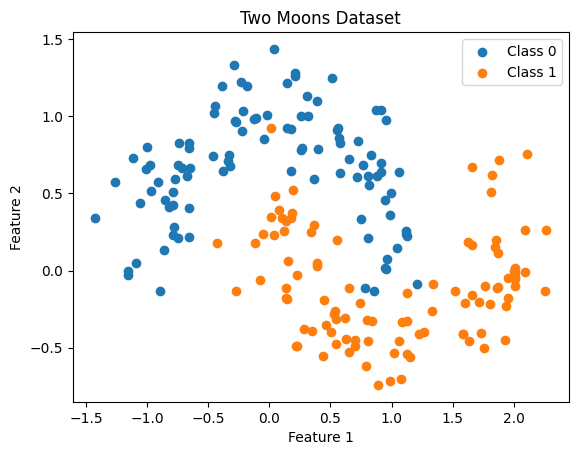

In [88]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate moons dataset
X, y = make_moons(n_samples=200, noise=0.18, random_state=42)

# Visualize the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1")
plt.legend()
plt.title("Two Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [92]:
import sys
import os

sys.path.append(os.path.abspath('..'))

from MLP.nn import MLP
from MLP.grad_engine import Value

In [94]:
EPOCH = 1000
lr    = 0.05

In [95]:
clf = MLP(
    n_inputs=2,
    layers=[
        (8, "relu"),
        (8, "relu"),
        (1, "sigmoid")
    ],
    epochs=EPOCH,
    learning_rate=lr
)

In [96]:
clf.fit(X_train_scaled, y_train, loss_fn="binary_cross_entropy", patience = 3)

EPOCH 0: binary_cross_entropy = 0.908164262273942
EPOCH 1: binary_cross_entropy = 0.8637661851234427
EPOCH 2: binary_cross_entropy = 0.8254009074977718
EPOCH 3: binary_cross_entropy = 0.7920103718479354
EPOCH 4: binary_cross_entropy = 0.7626077608839336
EPOCH 5: binary_cross_entropy = 0.736185140060078
EPOCH 6: binary_cross_entropy = 0.7120896972123084
EPOCH 7: binary_cross_entropy = 0.6897547462852959
EPOCH 8: binary_cross_entropy = 0.6692001370983703
EPOCH 9: binary_cross_entropy = 0.650208622530926
EPOCH 10: binary_cross_entropy = 0.6325916179710503
EPOCH 11: binary_cross_entropy = 0.616228706988758
EPOCH 12: binary_cross_entropy = 0.6009665869339594
EPOCH 13: binary_cross_entropy = 0.5866711326087842
EPOCH 14: binary_cross_entropy = 0.5731255504111076
EPOCH 15: binary_cross_entropy = 0.5602889622852678
EPOCH 16: binary_cross_entropy = 0.5482679565526891
EPOCH 17: binary_cross_entropy = 0.5369336535226764
EPOCH 18: binary_cross_entropy = 0.5261346328017535
EPOCH 19: binary_cross_ent

In [97]:
import numpy as np
preds = np.array([1 if clf(x).data > 0.5 else 0 for x in X_test_scaled])
accuracy = (preds == y_test).mean()
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.875


In [98]:
def plot_decision_boundary_custom(clf, X, y, scaler=None, resolution=0.01):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    grid = np.c_[xx.ravel(), yy.ravel()]

    if scaler:
        grid_scaled = scaler.transform(grid)
    else:
        grid_scaled = grid

    # Predict on grid
    Z = np.array([clf(x).data > 0.5 for x in grid_scaled])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.5)

    # Plot original data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolor='k')
    plt.legend()
    plt.title("Decision Boundary")
    plt.show()

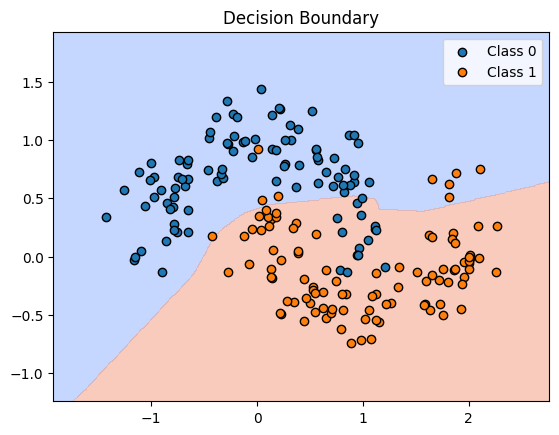

In [99]:
plot_decision_boundary_custom(clf, X, y, scaler=scaler, resolution=0.01)

In [86]:
clf.parameters()

[Value(data=-1.9724405992698086),
 Value(data=0.08376773215134302),
 Value(data=-0.9872509007943544),
 Value(data=-0.15501564585232175),
 Value(data=-0.22141016094834876),
 Value(data=-0.6330461080188574),
 Value(data=0.853030313369992),
 Value(data=-0.6015407734087069),
 Value(data=0.18599842838167674),
 Value(data=-0.8411340073958063),
 Value(data=-0.3962117283961423),
 Value(data=-0.4380855083383572),
 Value(data=1.7052084781820258),
 Value(data=-0.45371078286737454),
 Value(data=-0.9604800498598893),
 Value(data=-1.4980963055552705),
 Value(data=-0.7881696410105925),
 Value(data=0.6576415773537734),
 Value(data=1.080930047850532),
 Value(data=-0.7041362724623069),
 Value(data=0.04064664441817999),
 Value(data=-0.25839344426413186),
 Value(data=0.9570860534136767),
 Value(data=-0.4411915501116559),
 Value(data=-1.634157851028139),
 Value(data=0.4267960768264205),
 Value(data=-0.17190649311807893),
 Value(data=-0.5132683392687999),
 Value(data=2.032712326931092),
 Value(data=1.620171